<a href="https://colab.research.google.com/github/Crist1am/DataScience_CH/blob/main/PredictionModel_CristianVegaC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract

Cada año que pasa, las personas tienen más posibilidades de viajar a otros países y uno de los más atractivos para los países sudamericanos es España, principalmente por el idioma. España se caracteriza por tener ciudades muy turísticas en el verano europeo, como Barcelona, Madrid, la isla de Mallorca, entre otras. Existen muchas aplicaciones para alojar en distintas ciudades del mundo, dentro de las cuales su precio depende de muchos factores, como cercanía a atractivos turísticos, los servicios que ofrecen, la capacidad de personas admitidas, etc.
Este proyecto busca generar un modelo que permita estimar el precio de renta de alojamientos turísticos, ya sea de una habitación privada o de la renta de una casa/apartamento en la ciudad de Barcelona, comprendiendo las relaciones entre las características de los alojamientos y sus respectivas rentas, con el fin de ayudar a los anfitriones a ajustar sus valores de renta y a los que quieran incursionar en esta área de arrendar alojamientos turísticos tomando la mejor decisión.
Para este proyecto se cuenta con la hipótesis nula (H0) de que no existe una relación entre las características del alojamiento con el precio de este. Por el contrario, la hipótesis de investigación (H1) sugiere que si existe una relación entre las características de un alojamiento y su precio de renta.
Las hipótesis de interés para esta entrega son:

1.   Existe una correlación positiva entre el número de personas admitidas y el precio
2.   Existe una correlación positiva entre el número de camas y el precio del alojamiento

# Introducción

## Definición de objetivo

¿Como estimar el precio de renta de alojamientos turisticos en Barcelona, España estando dentro de la mayoria de los valores de estos, es decir, sin ser excesivamente caro ni excesivamente barato?

## Contexto comercial

España es uno de los destinos favoritos para los sudamericanos debido al idioma, pero tambien atrae a una gran cantidad de turistas de otros paises/continentes por la cultura deportiva que hay en el país. Es por eso que la cantidad de alojamientos en distintas ciudades de España ha ido aumentando, sin embargo existen alojamientos que son excesivamente costosos comparado a sus similares. Debido a esto, se cuenta con una base de datos desde enero, 2017 hasta febrero, 2021 de alojamientos turisticos en algunas ciudades de España con informacion importante de cada uno de estos como el precio, la cantidad de camas, la capacidad, la cantidad de servicios, etc.
Se espera que con la base de datos, se pueda estimar el precio de renta de alojamientos turisticos en la ciudad de Barcelona que quieran entrar al mercado, es decir, que futuros anfitriones puedan ingresar las caracteristicas del alojamiento que desean poner en el mercado, y de esta manera puedan saber a que precio deberian rentarlo, así como tambien ayudar a los actuales anfitriones que estan fuera el precio "normal" de renta y puedan ajustarse al mercado.

## Problema comercial

Se cuenta con una base de datos con 10.000 alojamientos turisticos en 8 ciudades de España, pero se requiere acotar el modelo a la ciudad de Barcelona, contabilizando solamente alojamientos de tipo "Private room" y "Entire home/apt", dado que es la ciudad y los tipos de alojamientos con más datos con respecto a los demás. Mediante una serie de limpiezas de datos nulos, outliers y eleccion de columnas de interes se espera responder mediante visualizaciones:

*   En promedio, que tipo de alojamiento son los de mayor costo? y los de menos costo?
*   Para el caso de los "Private_room", cual es la capacidad máxima de personas admitidas? y cuales son las más frecuentes?
*   Cuales es el tipo de alojamiento más popular en Barcelona?
Distribución entre el número de dormitorios y el número de baños
*   Como es la relación entre el número de dormitorios y baños por tipo de habitación?







## Contexto analítico

Se entrega una base de datos online en formato CSV desde un sitio web español el cual contiene detalles de 10.000 alojamientos turisticos ingresados en el dataset como el precio, fecha de ingreso, cantidad de dormitorios ofrecidos, servicios que entrega, las calificaciones hechas por los huespedes de limpieza, detalles de la descripcion, de la ubicacion, del trato con ellos, etc. Asi como el tipo de alojamiento, la ubicación precisa de este (longitud, latitud) entre otros. Como se mencionó, el formato de este dataset es CSV y el delimitador es ",".
El objetivo del este proyecto es determinar si existe correlación entre el precio de un alojamiento y alguno o algunos de sus atributos y de esta manera generar un modelo de correlación para estimar el precio de renta de estos inmuebles con el fin de ayudar a los anfitriones y huespedes a la hora de elegir el mejor alojamiento bajo sus parametros.
Con todos esta información se debe:

*   Importar el dataset
*   Leer los datos
*   Generar una nueva columna con la cantidad de servicios ofrecidos
*   Generar un nuevo dataset pero solo con las columnas de interes
*   Realizar un preprocesamiento de datos como la eliminación de datos incongruentes y la elección de la ciudad a trabajar (Barcelona) y los tipos de alojamientos ("Private room" y "Hotel home/apt")
*   Eliminar los datos que contengan outliers en alguna de sus columnas
*   Si la cantidad de nulos en cada columna es menor al 15% del total de los datos, reemplazarlos con el promedio correspondiente (en formato entero)
*   Realizar un analisis con el dataset resultante para ver el comportamiento de las variables respecto al target (variable "price") como la correlación entre ellas
*   Realizar un analisis de componentes principales para reducir la dimensionalidad de la base de datos
*   Definir un modelo de regresión para el problema
*   Calcular las metricas de regresión.








# Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#se importa re para generar una nueva columna con la cantidad de servicios
import re
import plotly.express as px
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# importamos el método que permite utilizar el análisis de componentes principales o PCA
from sklearn.decomposition import PCA


# Dataset alojamientos turisticos España


In [ ]:
df_aloj_turist = pd.read_csv("https://datamarket.es/media/samples/alojamientos-turisticos-sample.csv")

In [ ]:
#un vistazo a todas las columnas
df_aloj_turist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 10000 non-null  int64  
 1   md5                          10000 non-null  object 
 2   name                         9997 non-null   object 
 3   description                  9862 non-null   object 
 4   host_id                      10000 non-null  int64  
 5   neighborhood_overview        5899 non-null   object 
 6   neighbourhood_name           10000 non-null  object 
 7   neighbourhood_district       6079 non-null   object 
 8   latitude                     10000 non-null  float64
 9   longitude                    10000 non-null  float64
 10  room_type                    10000 non-null  object 
 11  accommodates                 10000 non-null  int64  
 12  bathrooms                    9926 non-null   float64
 13  bedrooms         

Vemos que tenemos un total de 10.000 datos pero con varias columnas con exceso de nulos (más de 2.000 nulos)

In [ ]:
df_aloj_turist.head()

,apartment_id,md5,name,description,host_id,neighborhood_overview,neighbourhood_name,neighbourhood_district,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_instant_bookable,reviews_per_month,country,city,insert_date
0,36187629,66fff4225feb2ddf104ea38f76e4bff1,Piso reformado excelente ubicacion,Apartamento reformado hace dos meses en el Cab...,261787331,NaN,BETERO,POBLATS MARITIMS,39.471490,-0.334600,...,10.0,10.0,10.0,10.0,NaN,True,0.22,spain,valencia,2019-12-31
1,5388904,48790b4dd865e98cc1f5302a2bba1a50,Nice Room in a Penthouse,The apartment is fully equipped. Large bathroo...,20843074,NaN,la Nova Esquerra de l'Eixample,Eixample,41.383530,2.153880,...,8.0,10.0,10.0,10.0,NaN,False,0.01,spain,barcelona,2021-01-12
2,39982406,d3a60e8898bd8ddce4325c8d3d6af7c8,LUXURY 5 BEDROOM APARTMENT IN MONCLOA-ARAVACA,Luxury Apartment located in a priveleged zone ...,308267305,Very quiet residential area in a Posh area of ...,El Plantío,Moncloa - Aravaca,40.466140,-3.809480,...,NaN,NaN,NaN,NaN,VT-12318,True,NaN,spain,madrid,2020-01-10
3,19344018,e2f33bae8c814924e8ce7e6efa8e7245,Habitación zona Atocha,Pareja joven alquila habitación para semana de...,135531703,NaN,Palos de Moguer,Arganzuela,40.405070,-3.693183,...,NaN,NaN,NaN,NaN,NaN,True,NaN,spain,madrid,2019-01-14
4,17218380,11295740bea58c9ae080a459cc8094c5,Spacious villa for rent with private pool,This large holiday home is located in a quiet ...,8345284,L'Escala has a strategic location - everything...,L'Escala,NaN,42.107823,3.141601,...,8.0,9.0,8.0,8.0,HUTG-020958,True,0.29,spain,girona,2018-10-20


# Data Wrangling

## Fecha del dataset

In [ ]:
#Pasamos la columna insert_date a formato fecha para ver en que año, mes empieza la base de datos y cuando termina.
df_aloj_turist['insert_date'] = pd.to_datetime(df_aloj_turist['insert_date'])
print("La base de datos comienza en",df_aloj_turist['insert_date'].dt.to_period("M").min())
print("La base de datos termina en",df_aloj_turist['insert_date'].dt.to_period("M").max())

La base de datos comienza en 2017-01
La base de datos termina en 2021-02


In [ ]:
#Cantidad de alojamientos publicados por año
df_aloj_turist.groupby(df_aloj_turist['insert_date'].dt.to_period('Y')).size()

insert_date
2017     806
2018    2109
2019    3424
2020    3086
2021     575
Freq: A-DEC, dtype: int64

Segun se aprecia, la cantidad de alojamientos turisticos ofrecidos para rentas en España ha ido aumentando al pasar los años, sin embargo se ve que entre 2019 y 2020 bajó alrededor de 330 alojamientos y esto puede deberse principalmente al COVID-19, el cual impidió que la gente pudiese viajar con normalidad. El año 2021 no entra en el analisis del aumento de alojamientos ya que los datos estan hasta febrero.

## Generar nueva columna

In [ ]:
#crear una nueva columna de cantidad de comodidades ya que no la tenemos
def contador_comas(elemento):
    return len(re.findall(r',', elemento))    #utilizamos el metodo re.findall() para que encuentre todas las comas en cada elemento de la lista de comodidades
                                              #y las cuente con len (ya que las devuelve como lista)

# Aplicar la función y agregar el resultado como nueva columna
df_aloj_turist['cant_comodidades'] = df_aloj_turist['amenities_list'].apply(contador_comas)+1
#al final del codigo se le suma 1 porque la funcion cuenta la cantidad de comas pero hay un elemento más
#(ejemplo tengo elemento1, elemento2, elemento3. Son 2 comas y 3 elementos)

In [ ]:
#ahora podemos ver la columna creada con la cantidad de comodidades que tiene cada alojamiento
df_aloj_turist.head()

,apartment_id,md5,name,description,host_id,neighborhood_overview,neighbourhood_name,neighbourhood_district,latitude,longitude,...,review_scores_communication,review_scores_location,review_scores_value,license,is_instant_bookable,reviews_per_month,country,city,insert_date,cant_comodidades
0,36187629,66fff4225feb2ddf104ea38f76e4bff1,Piso reformado excelente ubicacion,Apartamento reformado hace dos meses en el Cab...,261787331,NaN,BETERO,POBLATS MARITIMS,39.471490,-0.334600,...,10.0,10.0,10.0,NaN,True,0.22,spain,valencia,2019-12-31,18
1,5388904,48790b4dd865e98cc1f5302a2bba1a50,Nice Room in a Penthouse,The apartment is fully equipped. Large bathroo...,20843074,NaN,la Nova Esquerra de l'Eixample,Eixample,41.383530,2.153880,...,10.0,10.0,10.0,NaN,False,0.01,spain,barcelona,2021-01-12,10
2,39982406,d3a60e8898bd8ddce4325c8d3d6af7c8,LUXURY 5 BEDROOM APARTMENT IN MONCLOA-ARAVACA,Luxury Apartment located in a priveleged zone ...,308267305,Very quiet residential area in a Posh area of ...,El Plantío,Moncloa - Aravaca,40.466140,-3.809480,...,NaN,NaN,NaN,VT-12318,True,NaN,spain,madrid,2020-01-10,47
3,19344018,e2f33bae8c814924e8ce7e6efa8e7245,Habitación zona Atocha,Pareja joven alquila habitación para semana de...,135531703,NaN,Palos de Moguer,Arganzuela,40.405070,-3.693183,...,NaN,NaN,NaN,NaN,True,NaN,spain,madrid,2019-01-14,15
4,17218380,11295740bea58c9ae080a459cc8094c5,Spacious villa for rent with private pool,This large holiday home is located in a quiet ...,8345284,L'Escala has a strategic location - everything...,L'Escala,NaN,42.107823,3.141601,...,9.0,8.0,8.0,HUTG-020958,True,0.29,spain,girona,2018-10-20,25


## Dataframe de interes

Crearemos un nuevo df con las columnas que generan más interes para desarollar un modelo y que cuentan con suficientes datos para realizarlo.

In [ ]:
col_interes = ["price", "room_type", "accommodates","cant_comodidades", "bathrooms",'bedrooms', "beds","city"] #, "minimum_nights",'maximum_nights'
df = df_aloj_turist[col_interes].reset_index(drop=True)
df

,price,room_type,accommodates,cant_comodidades,bathrooms,bedrooms,beds,city
0,90.0,Entire home/apt,4,18,2.0,3.0,3.0,valencia
1,100.0,Private room,1,10,1.0,1.0,1.0,barcelona
2,220.0,Entire home/apt,10,47,3.0,5.0,8.0,madrid
3,200.0,Private room,2,15,1.0,1.0,2.0,madrid
4,143.0,Entire home/apt,10,25,4.0,5.0,8.0,girona
...,...,...,...,...,...,...,...,...
9995,95.0,Entire home/apt,5,41,1.0,3.0,3.0,mallorca
9996,67.0,Entire home/apt,4,25,1.0,2.0,2.0,madrid
9997,25.0,Entire home/apt,2,27,1.0,0.0,1.0,girona
9998,35.0,Private room,2,9,2.0,1.0,1.0,barcelona


El *target* de nuestro dataframe es:


*   **price**: Precio del alojamiento




Los *features* del dataframe de interes son:

*   **room_type**: Tipo de alojamiento.
    *   **Entire home/apt**: Alojamiento de tipo casa o apartamento.
    *   **Hotel room**: Alojamiento de hotel.
    *   **Private room**: Alojamiento de tipo habitación privada.
    *   **Shared room**: Alojamiento de tipo habitación compartida.
*   **accommodates**: Cantidad de personas admitidas en el alojamiento.
*   **cant_comodidades**: Cantidad de comodidades/servicios que ofrece el alojamiento. Esta columna se añade luego de contar los elementos de la columna original "amenities_list" (comodidades o servicios que el alojamiento pone a disposición).
*   **bathrooms**: Cantidad de baños que ofrece el alojamiento.
*   **bedrooms**: Cantidad de dormitorios que ofrece el alojamiento.
*   **beds**: Cantidad de camas que ofrece el alojamiento.
*   **city**: Ciudad a la que pertenece el alojamiento.



Como solo se analizarán los alojamientos de tipo "Entire home/apt" y "Private room" de la ciudad de Barcelona, en el siguiente apartado (**Preprocesamiento de datos**) se filtrará por aquellos reduciendo la cantidad de datos y acotandolo solo a una ciudad.

## Preprocesamiento de datos

In [ ]:
#miramos la cantidad de datos en cada uno de los tipos de habitación
df.groupby('room_type').size()

room_type
Entire home/apt    6930
Hotel room           83
Private room       2913
Shared room          74
dtype: int64

Como vemos, la cantidad de alojamientos de tipo Hotel room y Shared room es minima comparado a Entire home/apt y Private room, por lo que eliminamos estos datos y nos quedamos solo con 2 tipos de habitación

In [ ]:
df = df[~df['room_type'].isin(['Shared room', 'Hotel room'])]

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
#elegimos la ciudad donde se realizará el modelo
df.groupby('city').size()

city
barcelona    2771
girona       1521
madrid       2158
malaga        513
mallorca     1622
menorca       224
sevilla       512
valencia      522
dtype: int64

In [ ]:
#debido a la cantidad de datos, escogemos la ciudad de "barcelona"
#borramos todas las otras ciudades
df = df[~df['city'].isin(['girona', 'madrid', 'malaga', 'mallorca', 'menorca', 'sevilla', 'valencia'])]

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
#Como todos los datos pertenecen a la ciudad de "barcelona", borramos la coluna "city"
df.drop(columns=['city'], inplace=True)

In [ ]:
#Veremos si existen alojamientos sin camas o alojamientos sin dormitorios. Además si acepta 0 personas, ya que tampoco tendría sentido
print("el numero de alojamientos con 0 camas es:",df[(df.beds == 0)].shape[0])
print("el numero de alojamientos con 0 dormitorios es:",df[(df.bedrooms == 0)].shape[0])
print("el numero de alojamientos que acepta 0 personas es:",df[(df.accommodates == 0)].shape[0])

el numero de alojamientos con 0 camas es: 26
el numero de alojamientos con 0 dormitorios es: 68
el numero de alojamientos que acepta 0 personas es: 0


estos datos no tienen sentido a la hora de rentar alguna habitación, ya sea privada o una casa/apartamento, por lo que podemos eliminar esos registros


In [ ]:
#borramos los datos donde el numero de camas o el numero de dormitorios es 0
df.drop(df[(df.beds==0) | (df.bedrooms==0)].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,price,room_type,accommodates,cant_comodidades,bathrooms,bedrooms,beds
0,100.0,Private room,1,10,1.0,1.0,1.0
1,35.0,Private room,2,11,2.0,1.0,1.0
2,32.0,Private room,2,36,1.0,1.0,1.0
3,71.0,Entire home/apt,6,40,2.0,2.0,4.0
4,32.0,Private room,1,27,1.0,1.0,1.0
...,...,...,...,...,...,...,...
2673,50.0,Entire home/apt,3,15,1.0,1.0,1.0
2674,43.0,Private room,2,14,2.0,1.0,2.0
2675,20.0,Private room,1,8,1.0,1.0,1.0
2676,11.0,Private room,3,18,1.0,1.0,2.0


In [ ]:
#Corroboramos que se hayan borrado alojamientos con 0 domitorios y alojamientos con 0 camas
print("el numero de alojamientos con 0 camas es:",df[(df.beds == 0)].shape[0])
print("el numero de alojamientos con 0 dormitorios es:",df[(df.bedrooms == 0)].shape[0])

el numero de alojamientos con 0 camas es: 0
el numero de alojamientos con 0 dormitorios es: 0


In [ ]:
#Ahora vemos el tamaño de nuestro nuevo df
df.shape

(2678, 7)

In [ ]:
df.describe()

,price,accommodates,cant_comodidades,bathrooms,bedrooms,beds
count,2635.000000,2678.000000,2678.000000,2612.000000,2663.000000,2661.000000
mean,83.673082,3.346154,18.884242,1.352221,1.582050,2.243142
std,76.302907,2.264877,9.907267,0.644916,0.949084,1.893964
min,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,35.000000,2.000000,12.000000,1.000000,1.000000,1.000000
50%,60.000000,2.000000,17.000000,1.000000,1.000000,2.000000
75%,100.000000,4.000000,24.000000,2.000000,2.000000,3.000000
max,500.000000,16.000000,99.000000,8.000000,8.000000,20.000000


Gracias al *.describe()* podemos darnos cuenta que existen outliers en todas las columnas, ya que al fijarnos en valores como el promedio, percentil 25%, mediana, percentil 75%, el máximo y el mínimo, podemos ver que no hay congruencia entre algunos, principalmente en la columna "price", en donde el 75% de los datos son menores a 89 euros, tiene una media de 67 euros pero un valor maximo de 195. Por lo que es importante identificar estos valores atipicos y tratarlos.

## Identificar valores atipicos

En esta sección, se eliminarán los outliers de cada columna para no afectar medidas como la mediana, la media y la desviación estándar.

In [ ]:
#deteccion de los outliers
# se utiliza el rango intercuartil IQR, es decir cuartil3 - cuartil1
# se calculará el Q1 y el Q3 para estimar el rango intercuartil
def filtro_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print("el rango intercuartil es", IQR)

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    print("el limite superior es ", upper,"\n", "el limite inferior es", lower )
    #luego de encontrar el rango intercuartil, guardamos en "filtro" los valores que sean menores al limite inferior o mayores al limite superior
    filtro = (df[col] < lower) | (df[col] > upper)
    #luego, boraremos unicamente estos outliers sin castigar la fila de datos, dejando los outliers como NaN.
    df[col] = df[col].where(~filtro, np.nan)
    return df


### Identificar outliers en columna "bedrooms"

<Axes: xlabel='bedrooms'>

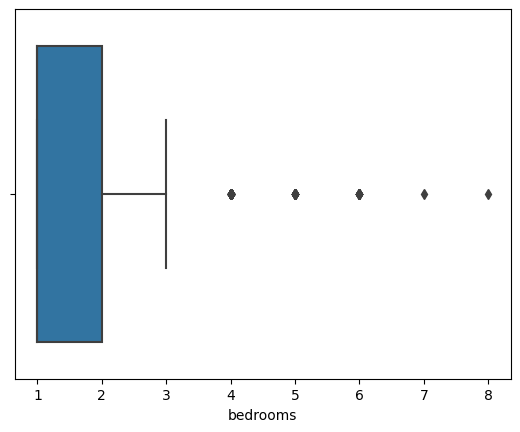

In [ ]:
sns.boxplot(data=df, x='bedrooms')

Como vemos, los alojamientos con aproximadamente más de 3 dormitorios entran a la categoria de outliers, por lo que eliminaremos las valores que contengan estos valores y los dejaremos como NaN





In [ ]:
df = filtro_outliers(df, 'bedrooms')

el rango intercuartil es 1.0
el limite superior es  3.5 
 el limite inferior es -0.5


### Identificar outliers en columna "price"

Se realizará el mismo procediento que se hizo con "bedrooms"

<Axes: xlabel='price'>

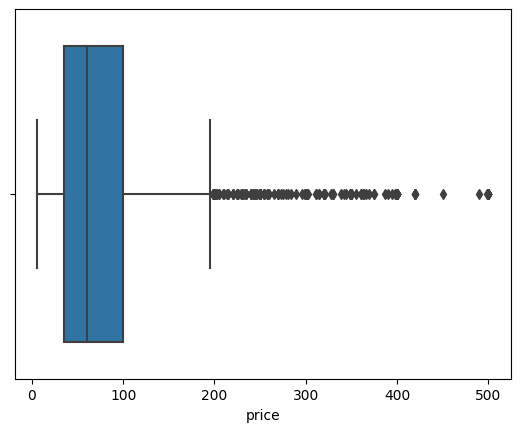

In [ ]:
sns.boxplot(data=df, x='price')

Como vemos, existen varios valores fuera de los intervalos de confianza, por lo que se eliminarán aquellos que esten fuera del limite superior

In [ ]:
df = filtro_outliers(df, 'price')

el rango intercuartil es 65.0
el limite superior es  197.5 
 el limite inferior es -62.5


### Identificar outliers en columna "beds"

<Axes: xlabel='beds'>

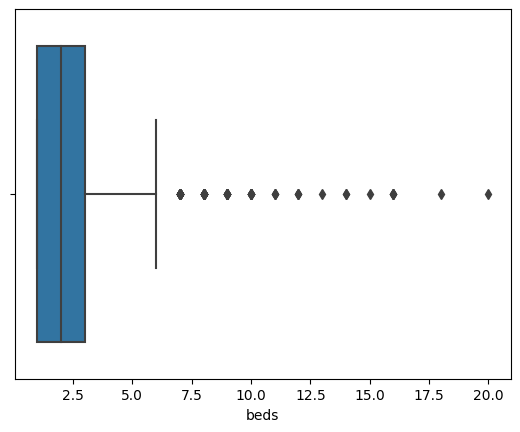

In [ ]:
sns.boxplot(data=df, x='beds')

In [ ]:
df = filtro_outliers(df, 'beds')

el rango intercuartil es 2.0
el limite superior es  6.0 
 el limite inferior es -2.0


### Identificar outliers en columna "accommodates"

<Axes: xlabel='accommodates'>

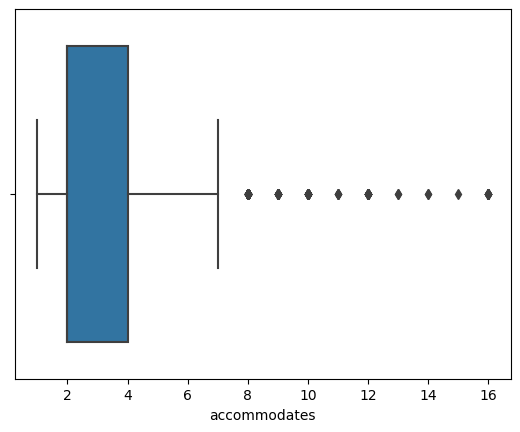

In [ ]:
sns.boxplot(data=df, x='accommodates')

In [ ]:
df = filtro_outliers(df, 'accommodates')

el rango intercuartil es 2.0
el limite superior es  7.0 
 el limite inferior es -1.0


### Identificar outliers en columna "cant_comodidades"

<Axes: xlabel='cant_comodidades'>

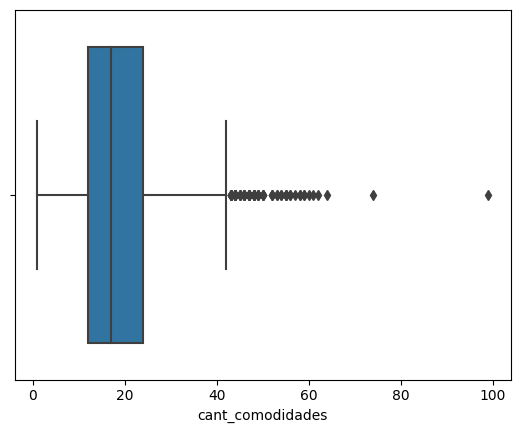

In [ ]:
sns.boxplot(data=df, x='cant_comodidades')

In [ ]:
df = filtro_outliers(df, 'cant_comodidades')

el rango intercuartil es 12.0
el limite superior es  42.0 
 el limite inferior es -6.0


### Identificar outliers en columna "bathrooms"

<Axes: xlabel='bathrooms'>

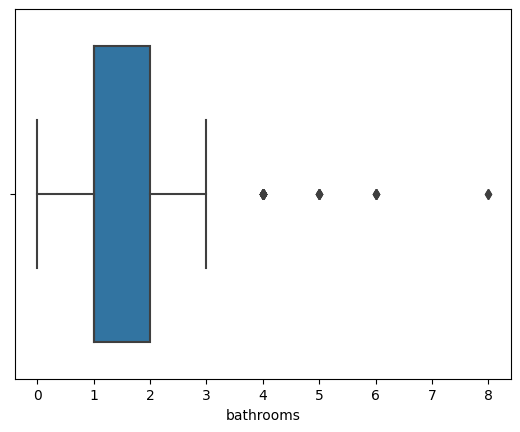

In [ ]:
sns.boxplot(data=df, x='bathrooms')

In [ ]:
df = filtro_outliers(df, 'bathrooms')

el rango intercuartil es 1.0
el limite superior es  3.5 
 el limite inferior es -0.5


## Tratar datos nulos


Puesto que solo se eliminaron los valores atipicos (si castigar la fila completa) quedamos con varios nulos que deben ser tratados

In [ ]:
#Ahora revisamos como quedó nuestro df con respecto a los valores nulos
nulos = pd.DataFrame({'Cantidad de nulos' : df.isnull().sum(), 'Porcentaje' : (df.isnull().sum()) / (len(df)) * (100)})
print("el total de filas del df es:",df.shape[0], "\n")
print(nulos, "\n", "\n", "El total de nulos en el Dataframe es:", nulos["Cantidad de nulos"].sum())

el total de filas del df es: 2678 

                  Cantidad de nulos  Porcentaje
price                           230    8.588499
room_type                         0    0.000000
accommodates                    154    5.750560
cant_comodidades                 76    2.837939
bathrooms                        97    3.622106
bedrooms                        151    5.638536
beds                            103    3.846154 
 
 El total de nulos en el Dataframe es: 811


Como vemos, tenemos un total de 811 nulos, pero si detallamos por columna, tenemos a "price" como la columna con más nulos (230 datos nulos de un total de 2678) representando aproximadamente un 8.6% de los datos, por lo que estamos dentro del rango de 10-15% donde podemos reemplazar los nulos (hasta 401 datos)

In [ ]:
#Vamos a identificar los tipos de datos de cada columna
df.dtypes

price               float64
room_type            object
accommodates        float64
cant_comodidades    float64
bathrooms           float64
bedrooms            float64
beds                float64
dtype: object

al estar en formato numerico nuestras variables podremos obtener la media, la cual se utilizará para reemplazar los datos nulos.

In [ ]:
#Ahora veremos el resumen numérico del df:
df.describe()

,price,accommodates,cant_comodidades,bathrooms,bedrooms,beds
count,2448.000000,2524.000000,2602.000000,2581.000000,2527.000000,2575.000000
mean,66.939775,2.959588,17.974251,1.312282,1.430154,2.012816
std,41.532466,1.588439,8.356008,0.520994,0.682731,1.340971
min,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,35.000000,2.000000,12.000000,1.000000,1.000000,1.000000
50%,55.000000,2.000000,16.000000,1.000000,1.000000,1.000000
75%,90.000000,4.000000,23.000000,2.000000,2.000000,3.000000
max,195.000000,7.000000,42.000000,3.000000,3.000000,6.000000


In [ ]:
#vemos el resumen numerico de las columnas con nulos por separado
col_con_nulos = ['price', 'accommodates', "cant_comodidades",'bathrooms', 'bedrooms','beds']
for i in col_con_nulos:
  print("\n","Descripción de la columna", i, "\n", df[i].describe(),"\n","\n")





 Descripción de la columna price 
 count    2448.000000
mean       66.939775
std        41.532466
min         6.000000
25%        35.000000
50%        55.000000
75%        90.000000
max       195.000000
Name: price, dtype: float64 
 


 Descripción de la columna accommodates 
 count    2524.000000
mean        2.959588
std         1.588439
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         7.000000
Name: accommodates, dtype: float64 
 


 Descripción de la columna cant_comodidades 
 count    2602.000000
mean       17.974251
std         8.356008
min         1.000000
25%        12.000000
50%        16.000000
75%        23.000000
max        42.000000
Name: cant_comodidades, dtype: float64 
 


 Descripción de la columna bathrooms 
 count    2581.000000
mean        1.312282
std         0.520994
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: bathrooms, dtype: float64 
 


 Descripció

Como la base de datos final está libre de *outliers*, se reemplazan los nulos por el promedio de cada una de sus columnas, ya que ya no se cuenta con estos valores que distorcionan datos como la media, desv.estándar, etc. Sin embargo, el valor a reemplazar debe ser entero, es decir, la media se redondeará sin ningun decimal, ya que no se puede contar con 1.3 baños o 1.4 dormitorios

In [ ]:
#Creamos una etiqueta con las columnas que tienen nulos
col_con_nulos = ['price', 'accommodates', "cant_comodidades",'bathrooms', 'bedrooms', 'beds']

#Creamos un ciclo for para que se repita el codigo por cada una de las variables con nulos
for i in col_con_nulos:
  df[i].fillna(df[i].mean().round(0), inplace = True)

In [ ]:
#Revisamos nuevamente los valores nulos
nulos = pd.DataFrame({'Cantidad de nulos' : df.isnull().sum(), 'Porcentaje' : (df.isnull().sum()) / (len(df)) * (100)})
nulos

,Cantidad de nulos,Porcentaje
price,0,0.0
room_type,0,0.0
accommodates,0,0.0
cant_comodidades,0,0.0
bathrooms,0,0.0
bedrooms,0,0.0
beds,0,0.0


In [ ]:
#vemos el tamaño final de nuestra base de datos sin nulos
print("el número de filas de nuestro df es", df.shape[0])
print("y el número de columnas de nuestro df es", df.shape[1])

el número de filas de nuestro df es 2678
y el número de columnas de nuestro df es 7


# EDA

##  Correlaciones

In [ ]:
#Generamos la matriz de correlación entre todas las variables para verificar cual o cuales son las que tienen una mayor relación con el target ("price")
matriz= df.corr()
matriz

<ipython-input-43-ee5d3d6e8d53>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz= df.corr()


,price,accommodates,cant_comodidades,bathrooms,bedrooms,beds
price,1.000000,0.536816,0.178855,0.140355,0.430991,0.451918
accommodates,0.536816,1.000000,0.233293,0.182905,0.719361,0.751299
cant_comodidades,0.178855,0.233293,1.000000,0.104502,0.204669,0.213080
bathrooms,0.140355,0.182905,0.104502,1.000000,0.188120,0.246165
bedrooms,0.430991,0.719361,0.204669,0.188120,1.000000,0.694608
beds,0.451918,0.751299,0.213080,0.246165,0.694608,1.000000


<Axes: >

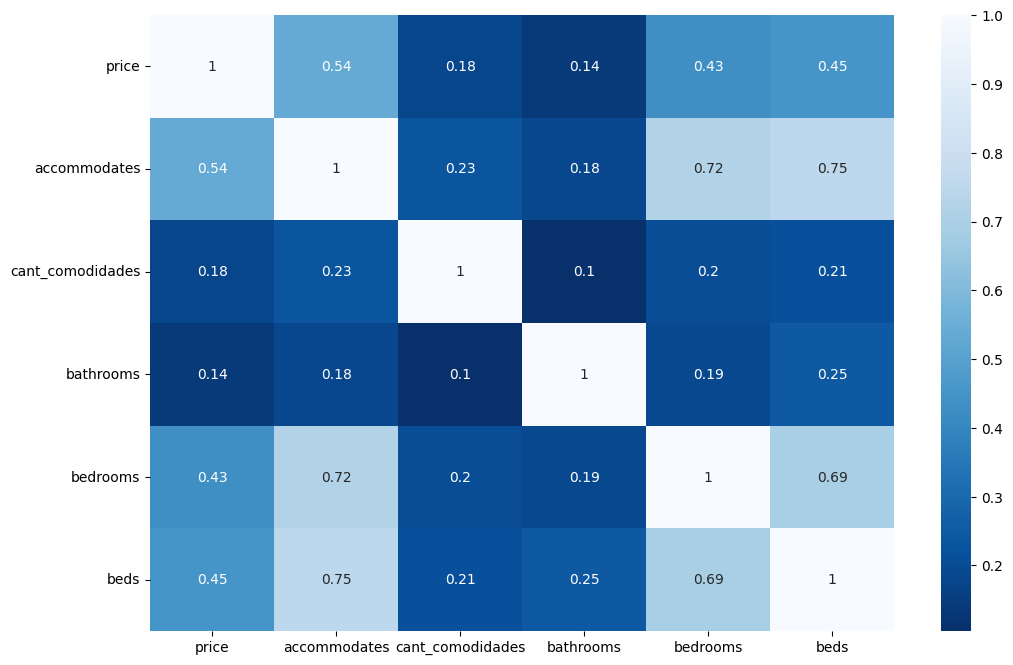

In [ ]:
#graficamos la matriz
plt.figure(figsize=(12,8))
sns.heatmap(matriz, cmap='Blues_r', annot=True)

Como vemos, la variable "price" no está altamente correlacionada con ninguna de las variables. Sin embargo, tiene una mayor correlación con las variables "accommodates", "bedrooms" y "beds" (correlación cercana a 0.5). Por otro lado, vemos de manera logica, que la variable "accommodates" o capacidad de personas, está altamente correlacionada a las variables "bedrooms" y "beds" (sobre 0.7)

Respondiendo a las hipotesis de interes tenemos que si se reafirma la primera, es decir, existe una correlación positiva entre la cantidad de personas admitidas (accommodates) y el precio (price).
La segunda hipotesis de interes tambien se afirma ya que si bien no es alta, existe una correlación positiva entre el numero de camas (beds) y el precio del alojamiento.

## Respuestas al problema comercial

### Tipo de alojamiento más y menos costoso

In [ ]:
# Convertir el resultado en un DataFrame
df_room_price = df.groupby('room_type')['price'].mean()
df_room_price =  df_room_price.reset_index()
fig = px.bar(x=df_room_price.room_type, y=df_room_price.price)
fig.update_xaxes(title_text="Tipo de Alojamiento")
fig.update_yaxes(title_text="Precio promedio")
fig.update_layout(title="Precio promedio por cada tipo de alojamiento")
fig.show()

Como vemos en el gráfico, y siguiendo la lógica, el alojamiento más costoso en la ciudad de "barcelona" es el de tipo "Entire home/apt" costando en promedio 92.4 Euros. Por el otro lado, la habitación privada o "Private room" es la menos costosa, teniendo un valor promedio de 45.2 Euros

### Capacidad máx. de personas admitidas y frecuencia

In [ ]:
#filtramos solo por alojamientos de tipo "Hotel room"
alojamientos_proom = df[df['room_type'] == 'Private room'] #Recordar que 2 equivale a "Hotel room"

# Calcular la frecuencia de cada cantidad de personas permitidas en alojamientos de tipo "hotel"
frecuencia_personas_proom = alojamientos_proom['accommodates'].value_counts()

#Generamos un nuevo df con estos datos
df_frecuencia = pd.DataFrame({'Cant_personas': frecuencia_personas_proom.index,
                              'Frecuencia': frecuencia_personas_proom.values})

fig = px.bar(x=df_frecuencia.Cant_personas, y=df_frecuencia.Frecuencia)
fig.update_xaxes(title_text="Cantidad de personas admitidas")
fig.update_yaxes(title_text="Frecuencia")
fig.update_layout(title="Capacidad de personas en alojamientos de tipo Private room")
fig.show()

Según este gráfico, vemos que los tipos de alojamiento "Private room" tienen una capacidad máxima de 7 personas en la ciudad de "barcelona", sin embargo esta capacidad tiene una frecuencia mínima (alrededor de 1-2 alojamientos de este tipo permite 7 personas), sin embargo, la capacidad de personas más popular en este tipo de alojamientos es de 2 personas, teniendo una frecuencia de 902 alojamientos, seguido de alojamientos de habitación privada que permiten 1 persona, con una frecuencia de 368 alojamientos. Esto es algo comun, ya que se está rentando una habitación, por lo que un exceso de personas dentro de ella no es conveniente ni para el huesped ni para el anfitrión.

### Alojamiento más popular en Barcelona

In [ ]:
#Creamos un nuevo df para agrupar por ciudad, tipo de habitación y la frecuencia de este ultimo
new_df = df.groupby(['room_type']).size()

# Convertir el resultado en un DataFrame
new_df = pd.DataFrame({'Frecuencia': new_df}).reset_index()


fig = px.pie(new_df, names='room_type', values='Frecuencia', title=f'Tipos de alojamientos en Barcelona')
fig.show()

Como vemos en el gráfico de torta, la distribución de estos 2 tipos de alojamiento es similar, sin embargo, "Private room" es la más popular en la ciudad con un 52.8% del total (1442 alojamientos turisticos en Barcelona corresponden a "Private room"), por otro lado, "Entire home/apt" tiene un 46.8% del total de alojamientos en la ciudad, abarcando 1236 inmuebles.

### Comparación dormitorios y baños por tipo de habitación

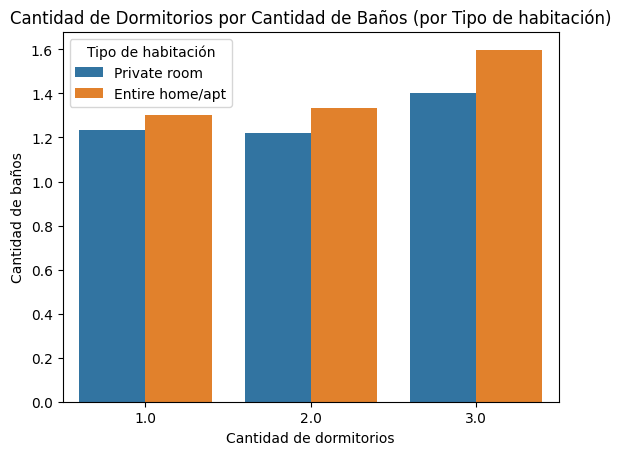

In [ ]:
sns.barplot(data=df, x='bedrooms', y='bathrooms', hue='room_type', errorbar=None)
plt.xlabel('Cantidad de dormitorios')
plt.ylabel('Cantidad de baños')
plt.title('Cantidad de Dormitorios por Cantidad de Baños (por Tipo de habitación)')
plt.legend(title='Tipo de habitación', loc='upper left')
plt.show()

Como podemos ver, en el caso de contar con 1 o 2 dormitorios, el numero de baños se mantiene casi igual tanto para "Private room" como para "Entire home/apt". Ya, cuando el alojamiento cuenta con 3 dormitorios, el numero de baños aumenta en ambos tipos de alojamiento.

## PCA

In [ ]:
#generamos un df que solo tome en cuenta las variables numericas (a excepcion de "price" ya que es el target)
df_2 = df.drop(columns=["price", "room_type"],  axis=1)
df_2.head()

,accommodates,cant_comodidades,bathrooms,bedrooms,beds
0,1.0,10.0,1.0,1.0,1.0
1,2.0,11.0,2.0,1.0,1.0
2,2.0,36.0,1.0,1.0,1.0
3,6.0,40.0,2.0,2.0,4.0
4,1.0,27.0,1.0,1.0,1.0


In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_2)
X_scaled

array([[-1.27246997, -0.96842477, -0.58476156, -0.60540984, -0.77001594],
       [-0.62388326, -0.84699192,  1.35815588, -0.60540984, -0.77001594],
       [-0.62388326,  2.18882953, -0.58476156, -0.60540984, -0.77001594],
       ...,
       [-1.27246997, -1.21129049, -0.58476156, -0.60540984, -0.77001594],
       [ 0.02470345,  0.00303809, -0.58476156, -0.60540984, -0.00937312],
       [-0.62388326, -1.08985763,  1.35815588, -0.60540984, -0.77001594]])

In [ ]:
# Creamos la instancia del modelo
modelo_pca = PCA(n_components=5)

# Entrenamos el modelo con nuestros datos
modelo_pca.fit(X_scaled)

PCA(n_components=5)

In [ ]:
# Empecemos por los componentes
# para esto usamos .components_
# vamos a guardar esta información en un dataframe, para poderlo ver más facilmente
lista_componentes = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
componentes = pd.DataFrame(data=modelo_pca.components_, columns = df_2.columns, index=lista_componentes)
componentes

,accommodates,cant_comodidades,bathrooms,bedrooms,beds
PC1,0.552064,0.233949,0.223236,0.536366,0.550427
PC2,-0.202626,0.525592,0.787870,-0.207456,-0.137543
PC3,0.000841,-0.817482,0.569151,0.036219,0.080488
PC4,0.257483,-0.011087,-0.042111,-0.798811,0.541947
PC5,-0.766726,0.024929,-0.060995,0.172806,0.614758


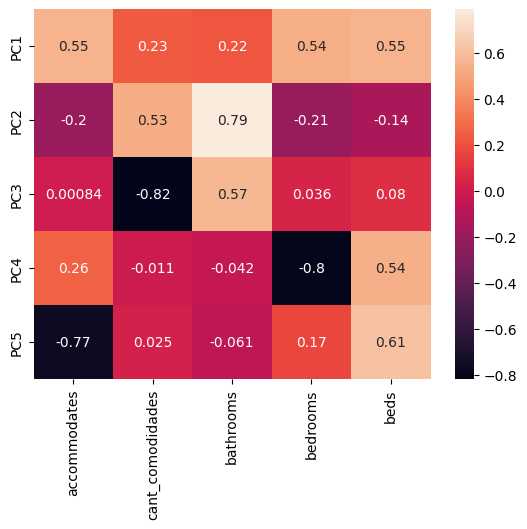

In [ ]:
#en esta matriz, se dice que una componente explica de buena manera una variable con una correlacion sobre 0.6
#es decir, esta muy correlacionada. Sobre 0.8 esta fuertemente correlacionada
ax = sns.heatmap(componentes, annot=True)

Como se puede ver, la PC2 está fuertemente correlacionada con la variable "bathrooms", asi como PC3, PC4 y PC5 estan fuertemente correlacionadas con "cant_comodidades, "bedrooms", "accommodates" respectivamente.

In [ ]:
#en el caso de varianaza, se necesita que las componentes elegidas expliquen al menos el 80% de las varianzas.
# Veamos la varianza explicada de cada componente
# para eso utilizamos .explained_variance_ratio_
print(lista_componentes)
print(modelo_pca.explained_variance_ratio_.round(2))

['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
[0.52 0.19 0.18 0.06 0.05]


De acuerdo a esto, las componentes que explican la mayor parte de las varianzas son PC1, PC2 y PC3, sumando el 89%.

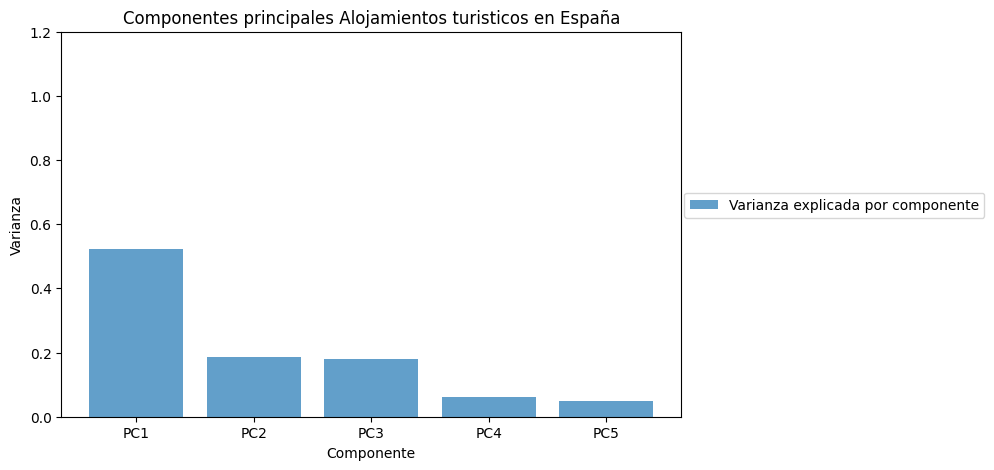

In [ ]:
#viendo esto ultimo de manera grafica
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(lista_componentes, modelo_pca.explained_variance_ratio_, alpha=0.7, label='Varianza explicada por componente')


ax.set_title('Componentes principales Alojamientos turisticos en España')
ax.set_xlabel('Componente')
ax.set_ylabel('Varianza')
ax.set_ylim(0, 1.2)
ax.legend(bbox_to_anchor = (1.5, 0.6))

In [ ]:
# cuando utilizamos .transform estamos calculando la función para cada dato y generando el resultado
# luego lo guardamos en un dataframe para poder utilizarlo más facilmente
proyecciones = pd.DataFrame(modelo_pca.transform(X_scaled), index=df_2.index,columns=lista_componentes)
proyecciones

,PC1,PC2,PC3,PC4,PC5
0,-1.808146,-0.480371,0.373877,-0.225978,0.409170
1,-0.987946,0.982799,1.380967,-0.142142,-0.203599
2,-0.711449,1.047637,-2.206575,-0.093981,-0.009410
3,3.324201,1.684730,-1.257967,0.532054,-0.444387
4,-1.325192,0.604640,-1.313698,-0.248865,0.460633
...,...,...,...,...,...
2673,-0.949977,-0.424091,-0.121378,0.101291,-0.570271
2674,-0.484041,1.069651,1.144382,0.266047,0.273093
2675,-1.864964,-0.608020,0.572416,-0.223285,0.403116
2676,-0.446072,-0.337240,-0.357962,0.509480,-0.093578


In [ ]:
#borramos todas las componentes, menos la PC1, PC2 y PC3
proyecciones.drop(columns=['PC4', 'PC5'], inplace=True)

In [ ]:
# Agregamos la variable target "price" y la variable categorica "room_type"
proyecciones['price'] = df['price']
proyecciones['room_type'] = df['room_type']
proyecciones

,PC1,PC2,PC3,price,room_type
0,-1.808146,-0.480371,0.373877,100.0,Private room
1,-0.987946,0.982799,1.380967,35.0,Private room
2,-0.711449,1.047637,-2.206575,32.0,Private room
3,3.324201,1.684730,-1.257967,71.0,Entire home/apt
4,-1.325192,0.604640,-1.313698,32.0,Private room
...,...,...,...,...,...
2673,-0.949977,-0.424091,-0.121378,50.0,Entire home/apt
2674,-0.484041,1.069651,1.144382,43.0,Private room
2675,-1.864964,-0.608020,0.572416,20.0,Private room
2676,-0.446072,-0.337240,-0.357962,11.0,Private room


Text(0.5, 1.2, 'Ciudad de Barcelona')

<Figure size 640x480 with 0 Axes>

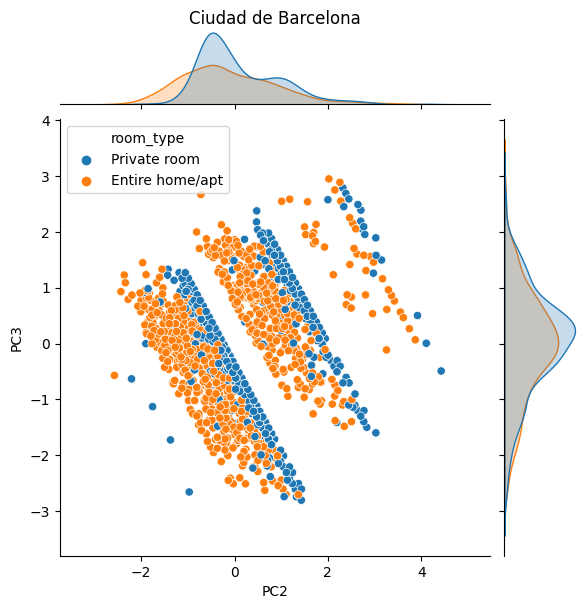

In [ ]:
#graficamos PC2 vs PC3 (ya que son variables altamente correlacianadas a "bathrooms" (de manera positiva)
#y "cant_comodidades" (de manera negativa) respectivamente)
plt.figure()
g = sns.jointplot(x='PC2', y='PC3', data=proyecciones, hue="room_type", palette="tab10")
g.fig.set_figwidth(6)
plt.title("Ciudad de Barcelona", y=1.2)

Recordar que PC2 está fuertemente correlacionado, y de manera positiva, a la variable "bathrooms" y PC3 está fuertemente correlacionado, y de manera negativa, a la variable "cant_comodidades". Por lo que, segun el grafico, a mayor cantidad de baños ofrecidos (mayor valor de PC2), mayor será la cantidad de comodidades que tendrá el alojamiento (menor valor de PC3). Tambien se ve la división entre los tipos de alojamiento "Private room" y "Entire home/apt" (excepto en el limite), por lo que podría ser "facil" identificar tambien cuando un alojamiento corresponde a "Private room" o a "Entire home/apt"

# Modelo de regresión (sin PCA)

## Transformación de columna "room_type"

Antes de realizar el modelo de regresión, usaremos one hot encoder con la variable "room_type" ya que contiene 2 valores unicos: "Private room" y "Entire home/apt". De esta manera, podremos ingresarlo a nuestro modelo de regresión.

In [ ]:
df.head()

,price,room_type,accommodates,cant_comodidades,bathrooms,bedrooms,beds
0,100.0,Private room,1.0,10.0,1.0,1.0,1.0
1,35.0,Private room,2.0,11.0,2.0,1.0,1.0
2,32.0,Private room,2.0,36.0,1.0,1.0,1.0
3,71.0,Entire home/apt,6.0,40.0,2.0,2.0,4.0
4,32.0,Private room,1.0,27.0,1.0,1.0,1.0


In [ ]:
df_reg=pd.get_dummies(df, columns=['room_type'])
df_reg.head()

,price,accommodates,cant_comodidades,bathrooms,bedrooms,beds,room_type_Entire home/apt,room_type_Private room
0,100.0,1.0,10.0,1.0,1.0,1.0,0,1
1,35.0,2.0,11.0,2.0,1.0,1.0,0,1
2,32.0,2.0,36.0,1.0,1.0,1.0,0,1
3,71.0,6.0,40.0,2.0,2.0,4.0,1,0
4,32.0,1.0,27.0,1.0,1.0,1.0,0,1


Nos quedamos con la primera columna "room_type_Entire home/apt", donde es 0 si corresponde a "Private room" y 1 si corresponde a "Entire home/apt"

In [ ]:
df_reg.drop("room_type_Private room", inplace=True, axis=1)
df_reg.head()

,price,accommodates,cant_comodidades,bathrooms,bedrooms,beds,room_type_Entire home/apt
0,100.0,1.0,10.0,1.0,1.0,1.0,0
1,35.0,2.0,11.0,2.0,1.0,1.0,0
2,32.0,2.0,36.0,1.0,1.0,1.0,0
3,71.0,6.0,40.0,2.0,2.0,4.0,1
4,32.0,1.0,27.0,1.0,1.0,1.0,0


In [ ]:
#renombramos la columna a room_type
df_reg.rename(columns={"room_type_Entire home/apt":"room_type"}, inplace=True)
df_reg.head()

,price,accommodates,cant_comodidades,bathrooms,bedrooms,beds,room_type
0,100.0,1.0,10.0,1.0,1.0,1.0,0
1,35.0,2.0,11.0,2.0,1.0,1.0,0
2,32.0,2.0,36.0,1.0,1.0,1.0,0
3,71.0,6.0,40.0,2.0,2.0,4.0,1
4,32.0,1.0,27.0,1.0,1.0,1.0,0


## Regresión lineal

In [ ]:
# importo librerias necesarias
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
#ponemos todas las columnas numericas del df de interes.
x= df_reg[[ 'accommodates', 'cant_comodidades', 'bathrooms', 'bedrooms', 'beds', 'room_type']]
y= df_reg['price']

In [ ]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#Defino el algoritmo a utilizar
lr = LinearRegression()

#Entreno el modelo
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred_lineal_train = lr.predict(x_train)
print('Precisión del modelo usando el (MSE) con datos de entrenamiento:')    #MSE es el error del modelo, mientras mas pequeño, es mejor. es la diferencia entre lo real y lo estimado
score_train = mse(y_train,y_pred_lineal_train)

print (score_train)

Precisión del modelo usando el (MSE) con datos de entrenamiento:
985.3340570889068


In [ ]:
#Realizo una predicción
y_pred_lineal_testeo = lr.predict(x_test)
y_pred_lineal_testeo
print('Precisión del modelo usando el (MSE) con datos del testeo:')
score_testeo = mse(y_test,y_pred_lineal_testeo)

print (score_testeo)

Precisión del modelo usando el (MSE) con datos del testeo:
946.0980783149137


## Regresión polinomica de grado 2

In [ ]:
#ahora le agregamos grados al polinomio y estandarizamos las features
modelo = Pipeline([('scaler', StandardScaler()),('features', PolynomialFeatures(degree=2)),
                    ('regression', LinearRegression()),
                    ])

In [ ]:
modelo.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('features', PolynomialFeatures()),
                ('regression', LinearRegression())])

In [ ]:
y_pred_polinomica_train = modelo.predict(x_train)
print('Precisión del modelo usando el (MSE) con datos de entrenamiento:')
score_train = mse(y_train,y_pred_polinomica_train)

print (score_train)

Precisión del modelo usando el (MSE) con datos de entrenamiento:
954.8557473725275


observemos que el score_train pasó de 985.3 a 954.9 al utilizar un polinomio de grado 2

In [ ]:
#Realizo una predicción
y_pred_polinomica_testeo = modelo.predict(x_test)
y_pred_polinomica_testeo
print('Precisión del modelo usando el (MSE) con datos del testeo:')
score_testeo = mse(y_test,y_pred_polinomica_testeo)

print (score_testeo)

Precisión del modelo usando el (MSE) con datos del testeo:
934.4887046782967


En este caso, el score_testeo pasó de 946.1 a 934.5, por lo que tambien se redujo el error

## Regresión Lasso

Se utilizará una regresión de Lasso con un polinomio de grado 2 y un alfa de 0.1. Con un valor de alpha más pequeño, el valor del score_train disminuye pero el score_testeo aumentaba, por lo que se opta por el alpha = 1e-01 para que el modelo haga predicciones más precisas en datos no vistos. Modificando el valor del polinomio, ocurre algo similar, es decir, el error de train disminuye, pero el del testeo aumenta

In [ ]:
from sklearn.linear_model import Lasso,  LassoLars

In [ ]:

modelo_Lars= Pipeline([ ('scaler', StandardScaler()),
                    ('features', PolynomialFeatures(degree=2)),
                     ('model',LassoLars(alpha=1e-01))

])

In [ ]:
modelo_Lars.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('features', PolynomialFeatures()),
                ('model', LassoLars(alpha=0.1))])

In [ ]:
y_pred_lasso_train = modelo_Lars.predict(x_train)
print('Precisión del modelo usando el (MSE) con datos de entrenamiento:')
score_train = mse(y_train,y_pred_lasso_train)

print (score_train)

Precisión del modelo usando el (MSE) con datos de entrenamiento:
955.5872435127733


En el caso del score_train, aumentó un poco comparado a la regresión de grado 2, llegando a 955.6 (con la regresión de grado 2 ya se había llegado a 954.9).

In [ ]:
y_pred_lasso_test = modelo_Lars.predict(x_test)
print('Precisión del modelo usando el (MSE) con datos del testeo:')
score_testeo = mse(y_test,y_pred_lasso_test)

print (score_testeo)

Precisión del modelo usando el (MSE) con datos del testeo:
927.6634701454507


 Con el score_testeo ocurrió lo contrario, es decir, el error bajó un poco comparado a la regresión de grado 2 simple, llegando a 927.7 (con la regresión de grado 2 habia bajado a 934.5)

# Calculo de metricas de regresión

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
#recordemos el df a utilizar para las regresiones
df_reg.head()

,price,accommodates,cant_comodidades,bathrooms,bedrooms,beds,room_type
0,100.0,1.0,10.0,1.0,1.0,1.0,0
1,35.0,2.0,11.0,2.0,1.0,1.0,0
2,32.0,2.0,36.0,1.0,1.0,1.0,0
3,71.0,6.0,40.0,2.0,2.0,4.0,1
4,32.0,1.0,27.0,1.0,1.0,1.0,0


In [ ]:
x= df_reg[[ 'accommodates', 'cant_comodidades', 'bathrooms', 'bedrooms', 'beds', 'room_type']]
y= df_reg['price']

In [ ]:
# crear el modelo de regresion lineal
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)

In [ ]:
#creamos el modelo de regresion polinomica de grado 2
modelo = Pipeline([('scaler', StandardScaler()),('features', PolynomialFeatures(degree=2)),
                    ('regression', LinearRegression()),])
#ajustamos el modelo con los datos de entrenamiento
modelo.fit(X_train,y_train)
#realizamos una predicción
y_pred_polinomica_testeo = modelo.predict(X_test)

In [ ]:
#creamos el modelo de regresion de Lasso
modelo_Lars= Pipeline([ ('scaler', StandardScaler()),
                    ('features', PolynomialFeatures(degree=2)),
                     ('model',LassoLars(alpha=1e-01)) ])
#ajustamos el modelo
modelo_Lars.fit(X_train,y_train)
#predecimos con X_test
y_pred_lasso_test = modelo_Lars.predict(X_test)

## R2

In [ ]:
print("R2 de la regresion lineal simple:",r2_score(y_test,y_pred))
print("R2 de la regresion polinomica de grado 2: ",r2_score(y_test,y_pred_polinomica_testeo))
print("R2 de la regresion de Lasso:",r2_score(y_test,y_pred_lasso_test))

R2 de la regresion lineal simple: 0.38346180378708394
R2 de la regresion polinomica de grado 2:  0.379902964977733
R2 de la regresion de Lasso: 0.38129741335938616


## RMSE

In [ ]:
print("RMSE de la regresion lineal simple:",np.sqrt(mse(y_test,y_pred)))
print("RMSE de la regresion polinomica de grado 2: ",np.sqrt(mse(y_test,y_pred_polinomica_testeo)))
print("RMSE de la regresion de Lasso:",np.sqrt(mse(y_test,y_pred_lasso_test)))

RMSE de la regresion lineal simple: 31.250330335470434
RMSE de la regresion polinomica de grado 2:  31.340393578433417
RMSE de la regresion de Lasso: 31.305135259634255


# Conclusiones en base a las regresiones y a las metricas

Se opta por realizar la Regresión de Lasso con un polinomio de grado 2 y alpha = 1e-02 ya que, al ir aumentando el grado del polinomio y/o disminuyendo más el valor de alpha, el MSE iba disminuyendo en el modelo de entrenamiento pero en el de testeo iba aumentando, es decir, existía un overfitting, ya que el modelo estaba aprendiendo mejor los valores de entrenamiento pero estaba fallando más con los datos que no veia (x_test).
Con respecto al valor de MSE en las 3 regresiones hechas, la que tenía un MSE más bajo en testeo fue la Regresión de Lasso, sin embargo no tenía el MSE más bajo en cuanto al entrenamiento. Por lo que se podría decir que para las predicciones más precisas de datos no vistos, el metodo de Lasso fue el mejor pero fallaba un poco más con las de entrenamiento.


Para el caso de las metricas no ocurre lo mismo, ya que el r2 mayor fue el de la regresión lineal simple con un r2=0.383 pero cercano al r2 con la regresión de Lasso (r2=0.381)

La otra métrica utilizada fue el RMSE ya que en el df a utilizar se hizo una limpieza exhaustiva con respecto a los outliers, por lo que este metodo sería el más adecuado (debido a que cuando existen estos valores, no es tan eficiente el RMSE). Además el valor de salida está en la misma unidad de medida que nuestro target (en este caso euros), por lo que es más facil de entender. En cuanto a los resultados, al igual que con r2, la regresión con mejor valor de RMSE fue la regresión lineal, con RMSE = 31.25, seguido de la regresión de Lasso con RMSE = 31.31, y como se mencionó, este valor de salida tiene la misma unidad de medida que nuestro target "price", por lo que corresponden a euros.

En otras palabras, la regresión lineal simple, si bien es la que tiene mayor valor de MSE, es la que mejor explica nuestro modelo con un r2=0.383 y es la más precisa ya que tiene el menor valor de RMSE (31.25)

El sobreajuste que existia al aumentar el grado de complejidad del modelo (aumentando el grado del polinomio o disminuyendo más aun el valor de alpha) podría evitarse tal y como se hizo, es decir corrigiendo estos parametros, pero tambien podría evitarse aumentando la cantidad de datos para que el modelo pueda entrenar con más datos, así como testear con más datos tambien.
Tambien es notorio que los valores de MSE son "altos" y esto se debe principalmente a que no existe una gran correlación entre todas las variables con el target (la correlación más alta con "price" es "accommodates" con 0.53) implicando posiblemente este alto valor de MSE